<a href="https://colab.research.google.com/github/RahulJuluru2/unit4assignments/blob/main/U4W20_47_VGG16_pre_trained_model_OCTR_C_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to : 
* Understand the VGG16 pre-trained model to classify Retinal damage from OCT scans

In [ ]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="850" height="480" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/misc/vgg16_pretrained_model.mp4" type="video/mp4">
</video>
""")

## Dataset

### History

#### OCTR

Retinal optical coherence tomography (OCT) is an imaging technique that uses coherent light to capture high-resolution of biological tissues. OCT is heavily used by ophthalmologists to obtain high resolution images of the eye retina. Retina of the eye functions much more like a film in a camera. OCT images can be used to diagnose many retina related eyes diseases.

OCT testing has become a standard of care for the assessment and treatment of most retinal conditions. OCT uses rays of light to measure retinal thickness. Approximately 30 million OCT scans are performed each year, and the analysis and interpretation of these images takes up a significant amount of time. 





#### Description

The dataset contains subfolders for each image category (NORMAL, CNV, DME, DRUSEN). There are 8054 training X-Ray images (JPEG) and 1000 X-Ray images for testing with 4 categories (NORMAL, CNV, DME, DRUSEN).

Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: CNV, DME, DRUSEN, and NORMAL

![alt text](https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Images/OCTR.jpg)


There are four classes in retinal oct images.They are:

1) Choroidal Neovascularization (CNV) : CNV is the creation of new blood vessels in the choroid layer of the eye. 

2) Diabetic Macular Edema (DME) : DME is an accumulation of fluid in the macula — part of the retina that controls our most detailed vision abilities — due to leaking blood vessels.

3) Drusen (DRUSEN) : Drusen are yellow deposits under the retina. Drusen are made up of lipids, a fatty protein. Drusen likely do not cause age-related macular degeneration (AMD).

4) Normal Eye Retina (NORMAL) : Normal retina with preserved foveal contour and absence of any retinal fluid/edema.



### VGG16

The VGG16- convolutional network, is trained on ImageNet dataset (1000 classes) which is capable of extracting features from an image and train its fully connected network in order to classify different types of retinal damage instead of objects.

### Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2216842" #@param {type:"string"}


In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959488784" #@param {type:"string"}


In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U4W20_47_VGG16_pre_trained_model_OCTR_C" #name of the notebook

def setup():
    ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip3 install torchvision")
    ipython.magic("sx pip install Pillow")
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/OCT2017.zip")
    ipython.magic("sx unzip OCT2017.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### 1. Importing the required packages

In [ ]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import datasets, transforms, models
import torch.optim as optim

### 2. Data Loading and Pre-processing

In [ ]:
transformations = transforms.Compose([
                                      transforms.Resize((224, 224)), # Resize the image to 224×224 pixels.
                                      transforms.ToTensor(),         # Convert the image to PyTorch Tensor                                                                        # Normalize the image
                                    ])

In [ ]:
trainset = datasets.ImageFolder('/content/OCT2017/Train', transform = transformations)

testset = datasets.ImageFolder('/content/OCT2017/Test', transform = transformations)


# Load the data. utils.dataloader is a package for loading the dataset 
train_loader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=10)
test_loader = torch.utils.data.DataLoader(testset, shuffle=False, batch_size=10)

In [ ]:
len(trainset)

8054

In [ ]:
# Mapping the name of the class to index
trainset.class_to_idx

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [ ]:
# Data Loader
train_loader.dataset

Dataset ImageFolder
    Number of datapoints: 8054
    Root location: /content/OCT2017/Train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [ ]:
# To print the size of Images
# Get a batch of training data
current_Images, current_labels = next(iter(train_loader))
current_Images[1].shape

torch.Size([3, 224, 224])

In [ ]:
# Print the labels 
current_labels

tensor([0, 0, 2, 2, 0, 3, 2, 2, 3, 0])

### 3. Plotting the sample Images

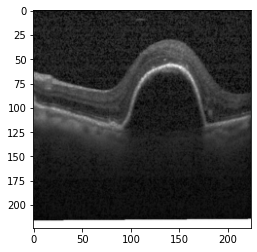

In [ ]:
plt.imshow(current_Images[0].permute(1, 2, 0));

### 4. Applying VGG16

In [ ]:
# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)
print(vgg16)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In the last layer of the classifier the VGG-16 is able to classify 1000 different labels but you just need 4 labels instead. In order to do that replace the last fully connected layer of the model with a new one with 4 output features instead of 1000.

In PyTorch, we can access the VGG-16 classifier with model.classifier, which is an 6-layer array. 



In [ ]:
# Print the input features of 6th module from the classifier
num_features = vgg16.classifier[6].in_features
print(num_features)

4096


In [ ]:
# Remove last layer
features = list(vgg16.classifier.children())[:-1] 
print(features)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False)]


In [ ]:
# Add the linear layer with 4 outputs
features.extend([nn.Linear(num_features, 4)])
print(features) 

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace=True), Dropout(p=0.5, inplace=False), Linear(in_features=4096, out_features=4, bias=True)]


In [ ]:
# Replace the model classifier
vgg16.classifier = nn.Sequential(*features) 
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

The output above is the summary of our model. Notice that the last layer has 4 output features as we have 4 ouput classes

### 5. Predicting the label of the given Image

In [ ]:
image = current_Images[0].unsqueeze(0)
output = vgg16(image)
_, predicted = torch.max(output, 1)
trainset.classes[predicted.item()], predicted

('NORMAL', tensor([3]))

### 6. Initializing CUDA

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### 7. Defining the Criterion and the Loss Function

In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(vgg16.parameters(), lr=0.003, momentum=0.9)

vgg16 = vgg16.to(device)

### 8. Training the model

The below code cell takes 20 mins to run


In [ ]:
# This code cell takes 20 mins to run

# No of Epochs
epoch = 5

# keeping the network in train mode
vgg16.train()
train_losses,  train_accuracy = [], []

# Loop for no of epochs
for e in range(epoch):
    train_loss = 0
    correct = 0
    # Iterate through all the batches in each epoch
    for images, labels in train_loader:

      # Convert the image and label to gpu for faster execution
      images = images.to(device)
      labels = labels.to(device)

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Passing the data to the model (Forward Pass)
      outputs = vgg16(images)

      # Calculating the loss
      loss = criterion(outputs, labels)
      train_loss += loss.item()

      # Performing backward pass (Backpropagation)
      loss.backward()

      # optimizer.step() updates the weights accordingly
      optimizer.step()

      # Accuracy calculation
      _, predicted = torch.max(outputs, 1)
      correct += (predicted == labels).sum().item()

    train_losses.append(train_loss/len(trainset))
    train_accuracy.append(100 * correct/len(trainset))
    print('epoch: {}, Train Loss:{:.6f} Train Accuracy: {:.2f} '.format(e+1,train_losses[-1], train_accuracy[-1]))

epoch: 1, Train Loss:0.068283 Train Accuracy: 70.91 
epoch: 2, Train Loss:0.020206 Train Accuracy: 93.79 
epoch: 3, Train Loss:0.012976 Train Accuracy: 95.87 
epoch: 4, Train Loss:0.008745 Train Accuracy: 97.38 
epoch: 5, Train Loss:0.005856 Train Accuracy: 98.11 


### 9. Model Evaluation

In [ ]:
# Keeping the network in evaluation mode 
vgg16.eval()  

Test_accuracy = 0

# Iterate through all the batches in each epoch
for images,labels in test_loader:
    # Convert the images and labels to gpu for faster execution
    images = images.to(device)
    labels = labels.to(device)

    # Do the forward pass 
    outputs = vgg16(images)

    # Accuracy calculation
    _, predicted = torch.max(outputs, 1)
    Test_accuracy += (predicted == labels).sum().item()

Accuracy = 100 * Test_accuracy / len(testset)
print("Accuracy of Test Data is", Accuracy)

Accuracy of Test Data is 98.2


### Please answer the questions below to complete the experiment:




In [ ]:
#@title State True or False: By specifying vgg16(pretrained=True) we load the vgg16 with pretrained weights of the imagenet dataset { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "True" #@param ["","True","False"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything is good" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")